In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd '/content/drive/MyDrive/AMLP2023-new'

/content/drive/MyDrive/AMLP2023-new


In [5]:
!git clone https://github.com/andreagiussani/Applied_Machine_Learning_with_Python.git

Cloning into 'Applied_Machine_Learning_with_Python'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 184 (delta 42), reused 33 (delta 23), pack-reused 127
Receiving objects: 100% (184/184), 3.58 MiB | 10.41 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [6]:
%cd Applied_Machine_Learning_with_Python

/content/drive/MyDrive/AMLP2023-new/Applied_Machine_Learning_with_Python


In [7]:
%ls

cover.jpg       egeaML/      Miscellaneous/  requirements.txt
data/           LICENSE      mtcars/         setup.cfg
Dockerfile.txt  MANIFEST.in  README.md       setup.py


In [8]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from egeaML.egeaML import DataIngestion
raw_data = DataIngestion(
    df='https://raw.githubusercontent.com/andreagiussani/Applied_Machine_Learning_with_Python/master/data/boston.csv', 
    col_target='MEDV'
    )


In [10]:
df = raw_data.load_data() # call instad of a static
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
X = df.drop(['MEDV'], axis=1)
y = df.MEDV

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [28]:
modern_scaler = StandardScaler()
scaled_data_02 = modern_scaler.fit_transform(X)

In [29]:
import pandas as pd
scaled_df = pd.DataFrame(scaled_data, columns=list(X))
scaled_df_02 = pd.DataFrame(scaled_data_02, columns=list(X))

In [30]:
scaled_df.head(2)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439


In [31]:
scaled_df_02.head(2)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
df_scaled_melted = pd.melt(scaled_df)

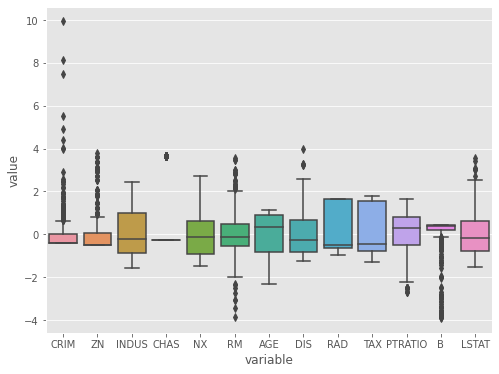

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x='variable', y= 'value', data=df_scaled_melted)

In [32]:
# Box-Cox Transform to force data to be Gaussian
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transf_data = pt.fit_transform(scaled_df)

In [33]:
transf_df = pd.DataFrame(transf_data)

In [35]:
transf_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.425408e-17,1.298917e-16,-5.616939e-17,2.808469e-16,-2.808469e-17,-2.106352e-17,-7.723291e-17,0.000000,-1.123388e-16,2.808469e-17,2.808469e-17,-2.948893e-16,-2.808469e-17
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-8.133749e-01,-5.963670e-01,-1.776313e+00,-2.725986e-01,-1.864384e+00,-4.570592e+00,-1.801147e+00,-1.779303,-1.771800e+00,-1.862324e+00,-1.971173e+00,-2.107298e+00,-2.080540e+00
25%,-7.526486e-01,-5.963670e-01,-8.627070e-01,-2.725986e-01,-9.742832e-01,-5.412477e-01,-9.563051e-01,-0.871233,-6.279458e-01,-7.726952e-01,-7.065370e-01,-5.340425e-01,-8.271107e-01
50%,-6.173413e-01,-5.963670e-01,-9.481552e-02,-2.725986e-01,4.029292e-02,-5.459466e-02,1.191873e-01,-0.046287,-3.242892e-01,-2.789346e-01,6.763728e-02,4.393255e-01,1.450648e-02
75%,1.006629e+00,1.139075e+00,1.028655e+00,-2.725986e-01,7.454326e-01,5.258653e-01,9.717794e-01,0.881137,1.518191e+00,1.384952e+00,8.381049e-01,8.248518e-01,7.713048e-01
max,1.984339e+00,1.909558e+00,2.047751e+00,3.668398e+00,2.084892e+00,3.127637e+00,1.325909e+00,2.339898,1.518191e+00,1.508309e+00,2.398097e+00,8.832838e-01,2.417470e+00


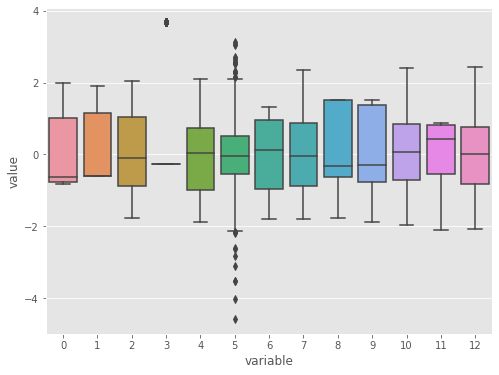

In [36]:
df_pt_melted = pd.melt(transf_df)
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x='variable', y= 'value', data=df_pt_melted)